# Linear Algebra 1 - Solving Linear Equations

In this notebook, we will explore the following topics:
1. Basic matrix operations in scipy
2. Solving simultaneous linear equations
3. A Physics example

Before using this notebook, familiarise yourself with the Advanced Python Tutorial section 5.2, which covers matrix algebra using numpy.


# 1. Basic Matrix Operations

Python/numpy/scipy provide a range of options for achieving basic matrix operations.  You will need to take a little care to ensure that your code implements the operations you intend it to.  This is largely due to the fact that some operators/functions will change their behaviour depending on the input you provide.  This section includes some recommendations for simple linear algebra, which should ensure your code behaves as desired.

Matrices can be implemented as a 2D `np.ndarray`.  Basic matrix arithmetic can then be performed using standard operators `+`,`-` and `@`.  You can also use `np.matmul()` for matrix multiplication. Numpy will also perform matrix multiplication with `np.dot()`, but this is not recommended if you can use `@` or `np.matmul()`.

In [1]:
import numpy as np

A = np.array([[1, 2, 3,],[4, 5, 6],[1, 0, 0]])
B = np.array([[1, 0, 0,],[0, 1, 0],[0, 0, 1]])

# addition
print(A + B)

# subtraction
print(A - B)

# scalar multiplication
print(3*B)

# matrix multiplication
print(np.matmul(A, B))
print(A @ B)


[[2 2 3]
 [4 6 6]
 [1 0 1]]
[[ 0  2  3]
 [ 4  4  6]
 [ 1  0 -1]]
[[3 0 0]
 [0 3 0]
 [0 0 3]]
[[1 2 3]
 [4 5 6]
 [1 0 0]]
[[1 2 3]
 [4 5 6]
 [1 0 0]]


Vectors can be implemented as 1D arrays, or as 2D arrays. A 1D array will be interpreted as row or column vector depending on the context in which it is used.  Use of 2D arrays allows you to specify row or column form.  This can be useful, since `np.matmul()` or `@` will throw an exception if you accidentally try to perform an illegal matrix operation. 

In [2]:
v  = np.array([1,2,3])
vr = np.array([[1,2,3]])
vc = np.array([[1],[2],[3]])

# two options for matrix * vector
print(A@v)
print(A@vc)

# two options for vector * matrix
print(v@A)
print(vr@A)

# this is not a valid matrix multiplication !
print(A@vr)

[14 32  1]
[[14]
 [32]
 [ 1]]
[12 12 15]
[[12 12 15]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 3)

Numpy will also provide the usual forms of vector product via `np.vdot()`, `np.cross()`, `np.inner()` and `np.outer()`. Again, `np.dot()` will provide a vector dot product, but is not recommended if you can use `vdot()`.

Other useful matrix operations are provided by numpy, such as :
* `np.transpose()` (also available via `ndarray.T`)
* `np.norm()`
* `np.trace()`

For further information, look at the reference pages :
https://numpy.org/doc/stable/reference/routines.array-manipulation.html
https://numpy.org/doc/stable/reference/routines.linalg.html

Finally, `scipy.linalg` provides some additional basic operations such as the determinant and the inverse.

In [3]:
import numpy as np
import scipy.linalg as linalg

A = np.array([[1, 2, 3,],[4, 5, 6],[1, 0, 0]])
detA = linalg.det(A)
print(detA)

invA = linalg.inv(A)
print(invA)

-3.000000000000001
[[-0.          0.          1.        ]
 [-2.          1.         -2.        ]
 [ 1.66666667 -0.66666667  1.        ]]


# 2. Simultaneous Equations

Many problems in physics require solving simultaneous equations. When these become large and complex, numerical routines are required.

A set of simultaneous equations can always be written in matrix form, for example, two equations in two unknowns ($x_1$ and $x_2$)

$$ax_1 + bx_2 = y_1$$
$$cx_1 + dx_2 = y_2$$

can be rewritten as

$$\left(\begin{array}{cc} a & b \\ c & d\end{array}\right)
\left(\begin{array}{c} x_1 \\ x_2 \end{array}\right) = 
\left(\begin{array}{c} y_1 \\ y_2 \end{array}\right)$$

An arbitrary set of equations is

$$Ax = y$$

where A is the matrix of coefficients, x is the vector of unknown variables $x_1$, $x_2$, ...
and y is the known vector of constants.

## 2.1 Inverse Matrix

One way to solve the above equation is to multiply both sides by the inverse of A:

$$A^{-1} A x = A^{-1} y$$

giving :

$$x = A^{-1} y$$

This is demonstrated in the example below for a simple test case.

In [11]:
import scipy.linalg as linalg

def solve_inv(a,y):
    x = linalg.inv(a) @ y
    return x

a = np.array([[1, 2, 3,],[4, 5, 6],[1, 0, 0]])
y = np.array([[1], [2], [3]])

print(solve_inv(a,y))

[[ 3.        ]
 [-6.        ]
 [ 3.33333333]]


Is this the solution?  We can easily check by inserting the solution into the original equation.

In [12]:
print(a @ x)

[[1.]
 [2.]
 [3.]]


Which is indeed equal to our `y` above.  This kind of test is known as a 'closure test' and will be used frequently throughout this unit to verify our code.

## 2.2 LU Decomposition

LU decomposition is covered in Async Lecture 1 and can be performed using routines in `scipy.linalg`.  Note that `scipy.linalg.lu()` simply performs the decomposition - ie. factorising the matrix A into matrices L, U, and P. To solve a simultaneous equation using LU decomposition, we need to use the `scipy.linalg.lu_solve()` function, which expects LU and P matrices as arguments, as shown in the example below.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu_solve.html

In [13]:
def solve_lu(a,y):
    lu, piv = linalg.lu_factor(a)
    x = linalg.lu_solve((lu, piv), y)
    return x

print(solve_lu(a,y))

[[ 3.        ]
 [-6.        ]
 [ 3.33333333]]


Note that the general purpose solver provided in `scipy.linalg.solve()` also utilises LU decomposition :

https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html

## 2.3 SVD Decomposition

SVD decomposition is available using `scipy.linalg.svd()`.  In this case, no `solve()` function is supplied for using SVD to solve simultaneous equations.  Instead we must write some code to calculate the solution using :

$\bar{x} = V \Sigma^{\dagger}U^{T} b$

Further details are provided in Async Lecture 1.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html

In [15]:
def solve_svd(a,y):
    u, s, v = linalg.svd(a)
    c = np.dot(u.T,y)
    w = linalg.solve(np.diag(s),c)
    x = np.dot(v.T,w)
    return x

print(solve_svd(a,y))

[[ 3.        ]
 [-6.        ]
 [ 3.33333333]]


# 3. Comparison of Algorithms

There are a variety of reasons that might influence our choice of algorithm, which will depend on the nature of teh problem we are trying to solve.

One interesting comparison we can perform is to consider solutions to a near-singular matrix problem such as the one below for small $k$ :

\begin{eqnarray*}
x + y + z & = & 5 \\
x + 2y - z & = & 10 \\
2x + 3y +kz & = & 15 
\end{eqnarray*}

Note that when $k=0$ the equations are degenerate and there is a space of solutions.

We will scan a wide range of values of $k$, use each of the above methods to find a solution, and plot a measure of the numerical error.  (To be specific, we insert the obtained solution into the equation above, find the difference with respect to the RHS ie. $ax - y$, and take the maximum value of this vector).

However, first we must add some protection to the inverse matrix method for errors when $k$ is 'too small' and the matrix is effectively singular.

In [25]:
def solve_inv(a,y):
    try:
        x = linalg.inv(a) @ y
    except linalg.LinAlgError as err:
        x = np.full_like(y,np.NaN)
    return x

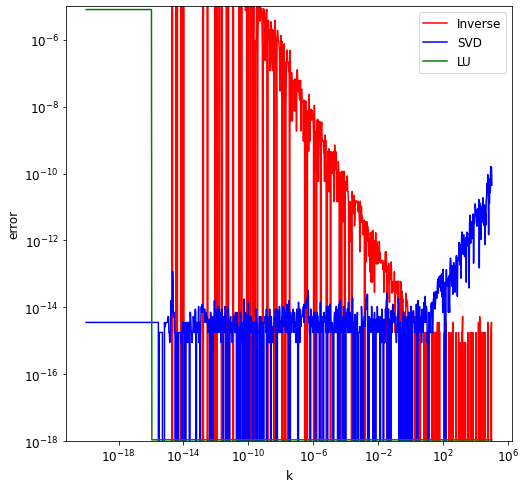

In [28]:
ks = np.logspace(-20, 5, 1000)
p1s = []
p2s = []
p3s = []

y = np.array([5,10,15])

# this code snippet is just to suppress some warnings
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # loop over values of k
    for k in ks:
        
        # compute matrix for this value of k
        a = np.array([[1,1,1],[1,2,-1],[2,3,k]])
        
        # find the error for inverse method
        diff1 = a @ solve_inv(a,y) - y
        p1s.append(abs(np.amax(diff1)))

        # find the error for LU decomposition
        diff2 = a @ solve_lu(a,y) - y
        p2s.append(abs(np.amax(diff2)))

        # find the error for SVD decomposition
        diff3 = a @ solve_svd(a,y) - y
        p3s.append(abs(np.amax(diff3)))
        
# LU solver will only result in 0 or NaN - replace these with min/max y values respectively, using a list comprehension
new_p2s = [1.1e-18 if x==0 else 0.8e-5 for x in p2s]

fig=plt.figure(figsize=(8, 8))
plt.rcParams.update({'font.size': 12})
plt.plot(ks, p1s, color='r', label="Inverse")
plt.plot(ks, p3s, color='b', label="SVD")
plt.plot(ks, new_p2s, color='g', label="LU")
plt.yscale("log")
plt.ylabel("error")
plt.xscale("log")
plt.xlabel("k")
plt.ylim(1e-18, 1e-5)
plt.legend()
plt.show()

Note that for $k$ of order the machine epsilon ($10^{-16}$ or so) both inverse method and LU decomposition have very large error.  Above this value, LU decomposition has no error, while the inverse method has error inversely proportional to $k$.  This is even more suprising when we consider that, behind the scenes, `scipy.linalg.inv()` actually uses LU decomposition to find the inverse.  The reason here is that when computing the inverse from the LU decomposition, we have to divide by the determinant of the matrix, which is inversely proportional to $k$. Division by a large number can introduce rounding error. However, finding the solution using LU decomposition alone does not require such a division and does not introduce such an error.

SVD notes

## 4. Physics Example

Here we illustrate the use of simultaneous equation solvers in a familiar context - the use of Kirchoff's laws and Ohm's law to understand resist networks.  Typically, analysis of a resistor network will involve solving simultaneous equations, to calculate voltage and current at the desired points in the network.  Consider the electronic circuit shown in the diagram.

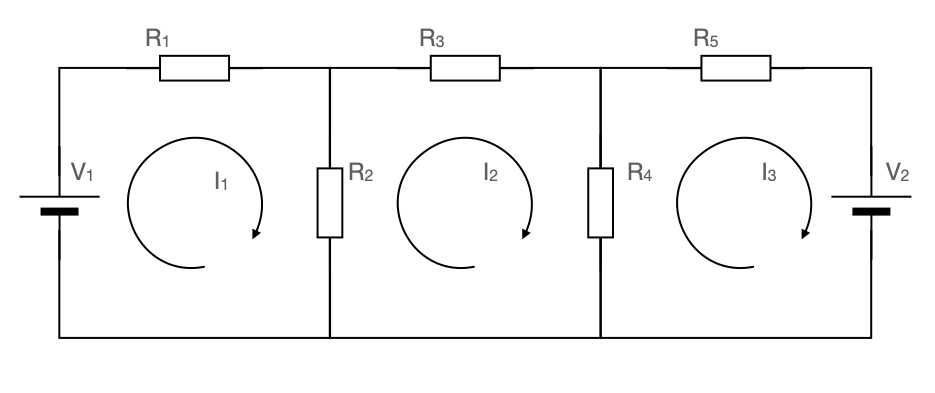

Where : $V_1 = 12V$, $V_2 = 12V$, $R_1 = 3 \Omega$, $R_2 = 3 \Omega$, $R_3 = 10 \Omega$, $R_4 = 2 \Omega$, $R_5 = 2 \Omega$. 

By identifying the three current loops indicated, we can use Kirchoff's loop rule and Ohm's law to write :
$$
V_1 = I_1 R_1 + (I_1 - I_2) R_2 \\
0   = (I_2 - I_1) R_2 + I_2 R_3 + (I_2 - I_3) R_4 \\
-V_2 = (I_3 - I_2) R_4 + I_3 R_5
$$

So we have a set of simultaneous equations, which we can write as a matrix equation :

$$
\begin{pmatrix}
R_1+R_2 & -R_2 & 0 \\
-R_2 & R_2+R_3+R_4 & -R_4 \\
0  & -R_4 & R_4+R_5 \\
\end{pmatrix}
\begin{pmatrix}
I_1 \\
I_2 \\
I_3
\end{pmatrix}
=
\begin{pmatrix}
V_1 \\
0 \\
-V_2
\end{pmatrix}
$$

Solving this matrix equation will provide the current at all points in the circuit.  This method is known as "mesh analysis" of circuits.

We can write a simple function that, given the voltage and resistor values, will return the currents :

In [8]:
def meshAnalysis(v1, v2, r1, r2, r3, r4, r5):
    m = np.array ([[r1+r2, -r2, 0],[-r2,r2+r3+r4,-r4],[0,-r4,r4+r5]])
    v = np.array([[v1],[0],[-v2]])
    i = linalg.solve(m,v)
    return i

Which, for the values given, will return the three currents :

In [9]:
i = meshAnalysis(12, 12, 3, 3, 10, 2, 2)

print(i)

[[ 2.]
 [ 0.]
 [-3.]]


Or we could calculate, for example, how $I_2$ will vary as a function of $R_4$, with all other values fixed :

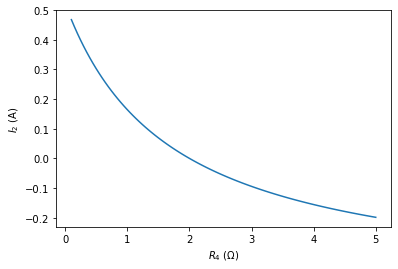

In [10]:
r4s = np.linspace(0.1, 5.0, 100)
i2s = np.empty(len(r4s))

for j,r4 in enumerate(r4s):
    i     = meshAnalysis(12, 12, 3, 3, 10, r4, 2)
    i2s[j] = i[1]

import matplotlib.pyplot as plt

plt.plot(r4s, i2s)
plt.ylabel('$I_2$ (A)')
plt.xlabel('$R_4$ ($\Omega$)')
plt.show()